We will start by downloading a sample mesh for the geometric texture that we would like to synthesize. 

In [2]:
import constants
from process_data import files_utils

#target_path = f'{constants.DATA_ROOT}/cloud.zip'
#files_utils.download_file_from_google_drive('1e9vpySX4WUic09JGk7-LV_h8V6H4Nb_I', target_path)
#files_utils.decompress_data(target_path)


Lets have a look on our *reference* texture.

/Users/catokollenhof/Library/CloudStorage/OneDrive-Persönlich/TU_Berlin/Master/5_Semester/Computer_Graphics/geometric-textures-project/process_data/mesh_utils.py:220: UserWarning: Using torch.cross without specifying the dim arg is deprecated.
Please either pass the dim explicitly or simply use torch.linalg.cross.
The default value of dim will change to agree with that of linalg.cross in a future release. (Triggered internally at /Users/runner/miniforge3/conda-bld/libtorch_1760336151443/work/aten/src/ATen/native/Cross.cpp:67.)
  face_normals = torch.cross(vs[faces[:, 1]] - vs[faces[:, 0]], vs[faces[:, 2]] - vs[faces[:, 1]])


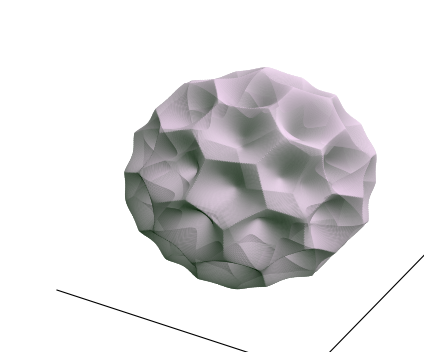

In [3]:
%matplotlib inline
from process_data import mesh_plotter
import matplotlib.pyplot as plt

mesh_plotter.plot_mesh(f'{constants.DATA_ROOT}/raw/comb_spike_ball.obj')


Now, we will create our training data. This will take ~1 hour.

In [4]:
from custom_types import CUDA, CPU
from process_data.ground_truth_optimization import GroundTruthGenerator
import options

args = options.GtOptions(tag='demo', mesh_name='cloud', template_name='sphere', num_levels=6)
device =  CPU
gt_gen = GroundTruthGenerator(args, device)
gt_gen.generate_ground_truth_meshes()


cloud_demo Level: 0:   0%|          | 0/3000 [00:00<?, ?it/s]

ValueError: mesh file /Users/catokollenhof/Library/CloudStorage/OneDrive-Persönlich/TU_Berlin/Master/5_Semester/Computer_Graphics/geometric-textures-project/dataset/raw/cloud is not supported

Our *ground truth* training sequence:

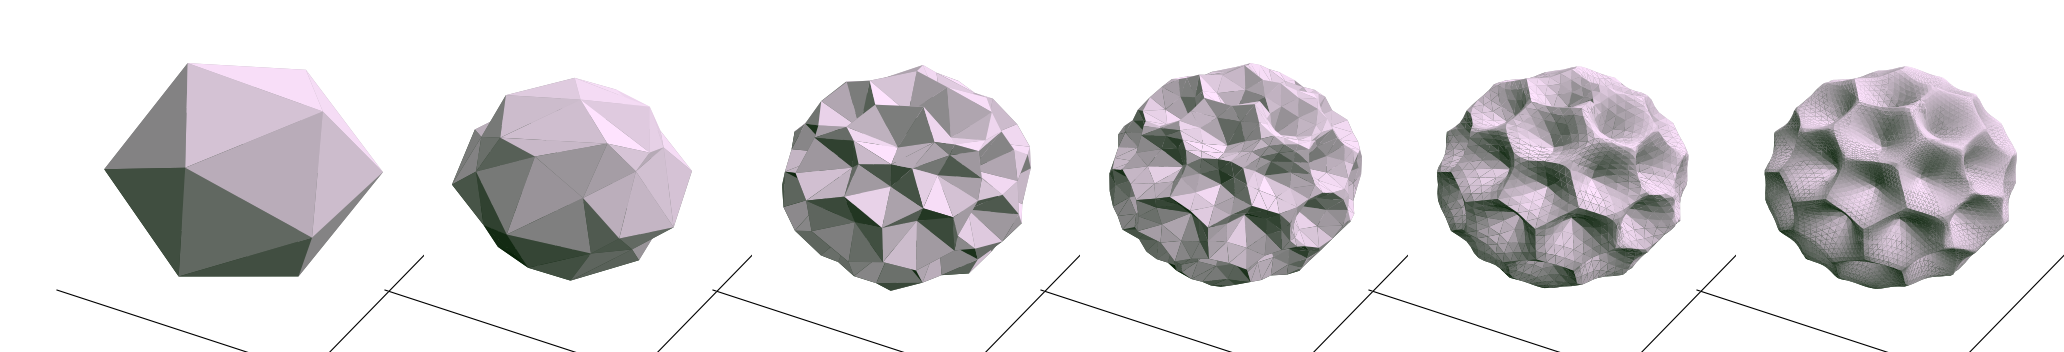

In [5]:
gt_paths = [f'{constants.DATA_ROOT}/comb_spike_ball/comb_spike_ball_level{i:02d}.obj' for i in range(6)]
mesh_plotter.plot_mesh(*gt_paths)

Finally we can train a *deep geometric texture synthesis* model. This will take ~2 hours.

In [ ]:
from training import Trainer

args = options.TrainOption(tag='demo', mesh_name='comb_spike_ball', template_name='sphere', num_levels=6)
trainer = Trainer(args, device)
trainer.train()

init SingleMeshGenerator model
init SingleMeshDiscriminator model


Now we can use our model to synthesize the geometric texture on other meshes!

loading options from /Users/catokollenhof/Library/CloudStorage/OneDrive-Persönlich/TU_Berlin/Master/5_Semester/Computer Graphics/geometric-textures/checkpoints/cloud_demo/options.pkl
loading SingleMeshGenerator model from /Users/catokollenhof/Library/CloudStorage/OneDrive-Persönlich/TU_Berlin/Master/5_Semester/Computer Graphics/geometric-textures/checkpoints/cloud_demo/SingleMeshGenerator.pth


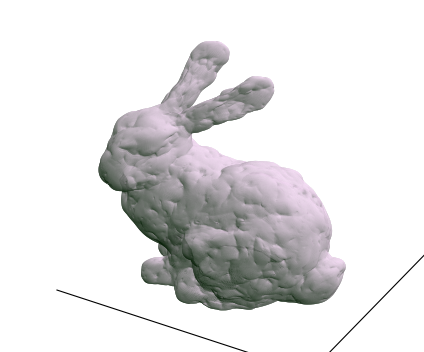

In [ ]:
from dgts_base import Mesh2Mesh
from process_data import mesh_utils

from process_data.mesh_utils import MeshDS
MeshDS.MAX_V_DEG = 64  # oder noch größer, falls nötig

m2m = Mesh2Mesh(args, CPU)
mesh = mesh_utils.load_real_mesh('bunny', 0, True)
out = m2m(mesh, 2, 5, 0)
out.plot()

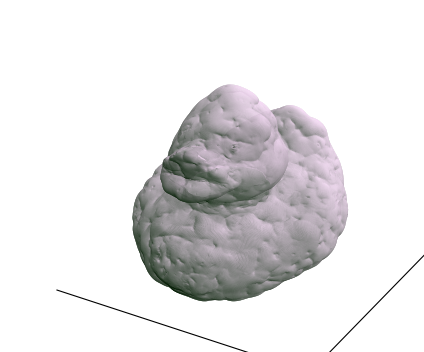

In [ ]:
mesh = mesh_utils.load_real_mesh('duck', 0, True)
out = m2m(mesh, 2, 5, 0)
out.plot()